First 5 rows of the dataset:
   Application_ID Application_Date  Gender  Age Employment_Type  \
0               1       2022-01-01    Male   37        Salaried   
1               2       2022-01-02  Female   29        Salaried   
2               3       2022-01-03    Male   53   Self-Employed   
3               4       2022-01-04    Male   40   Self-Employed   
4               5       2022-01-05    Male   33        Salaried   

   Annual_Income  Loan_Amount Loan_Purpose  Credit_Score Loan_Status  
0         162312       173197    Education           528    Approved  
1         112493       465115     Personal           823    Approved  
2         145149        47291    Education           454    Rejected  
3         183834       433276    Education           722    Rejected  
4          28259       399754     Personal           545    Approved  

Missing Values in Each Column:
Application_ID      0
Application_Date    0
Gender              0
Age                 0
Employment_Type     0


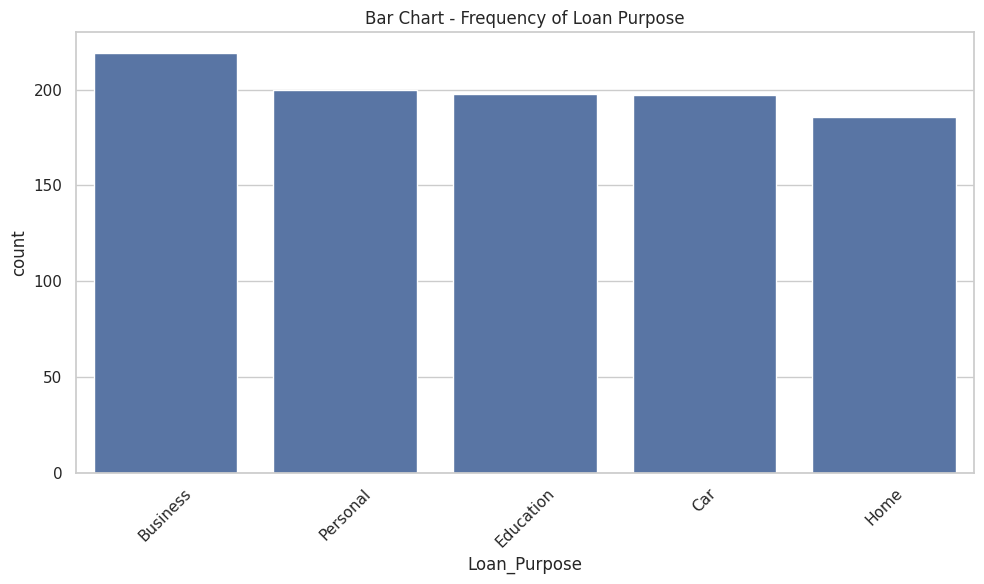

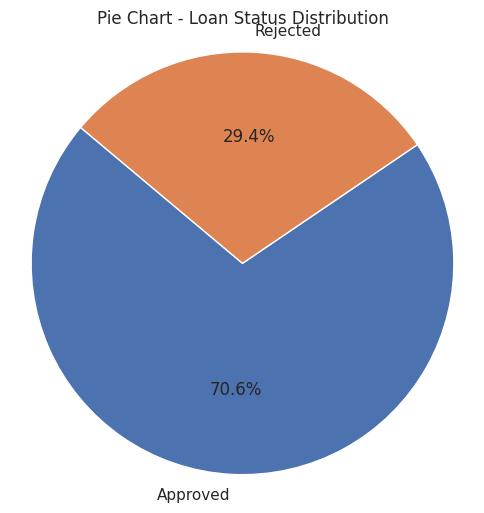

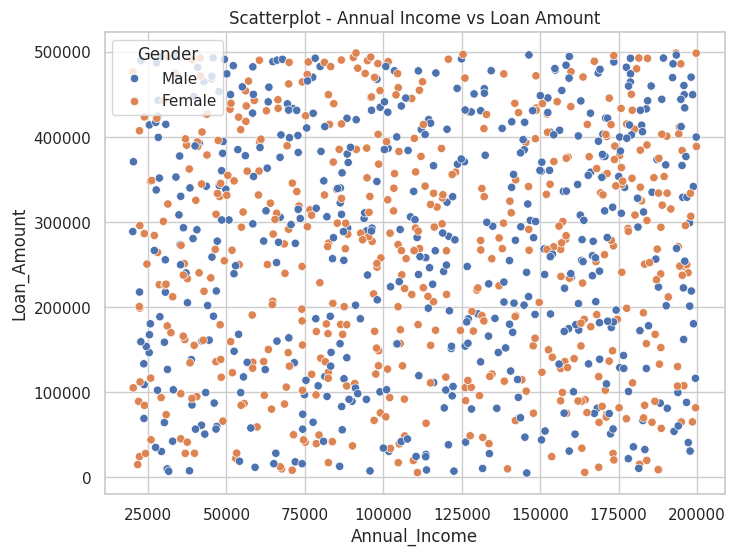

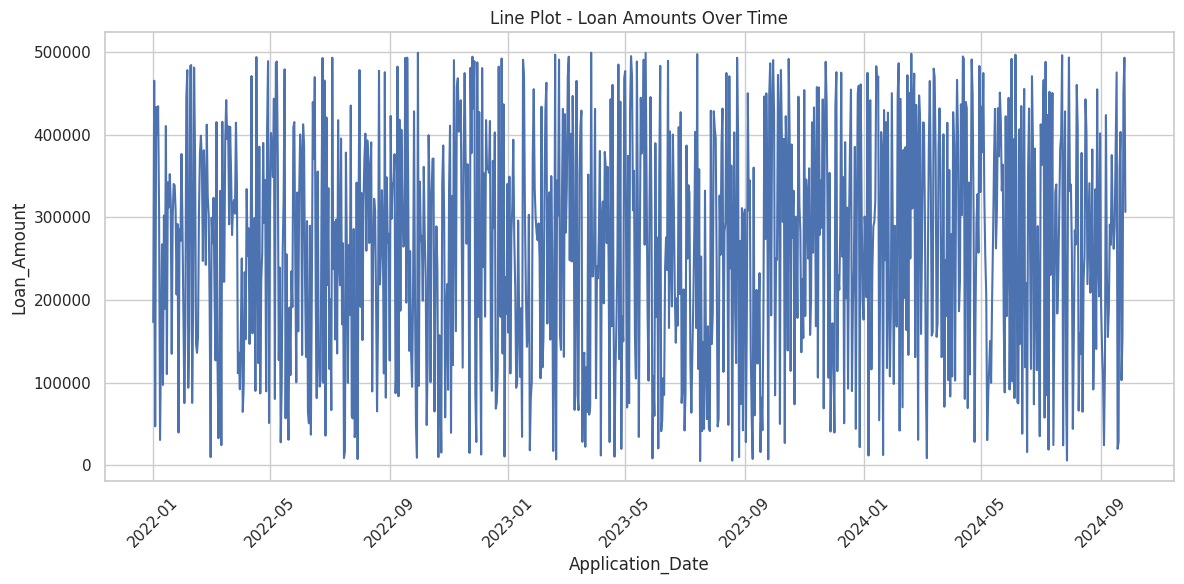

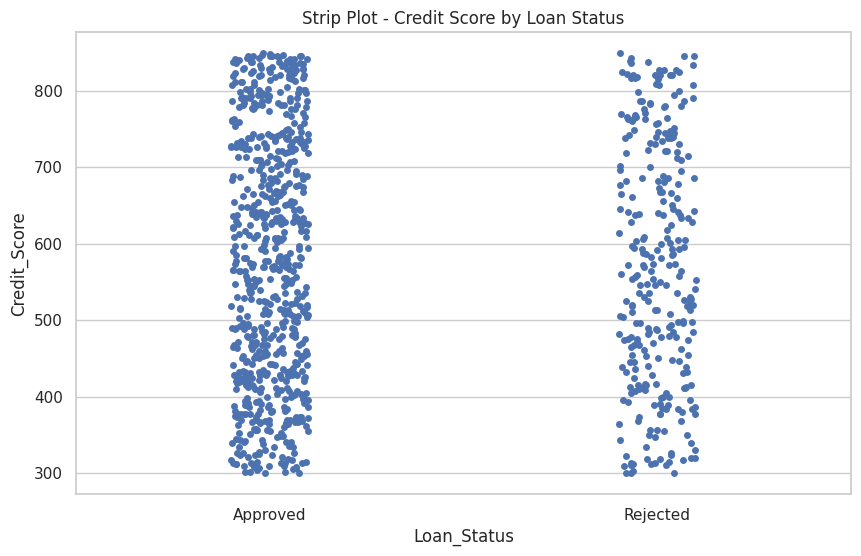

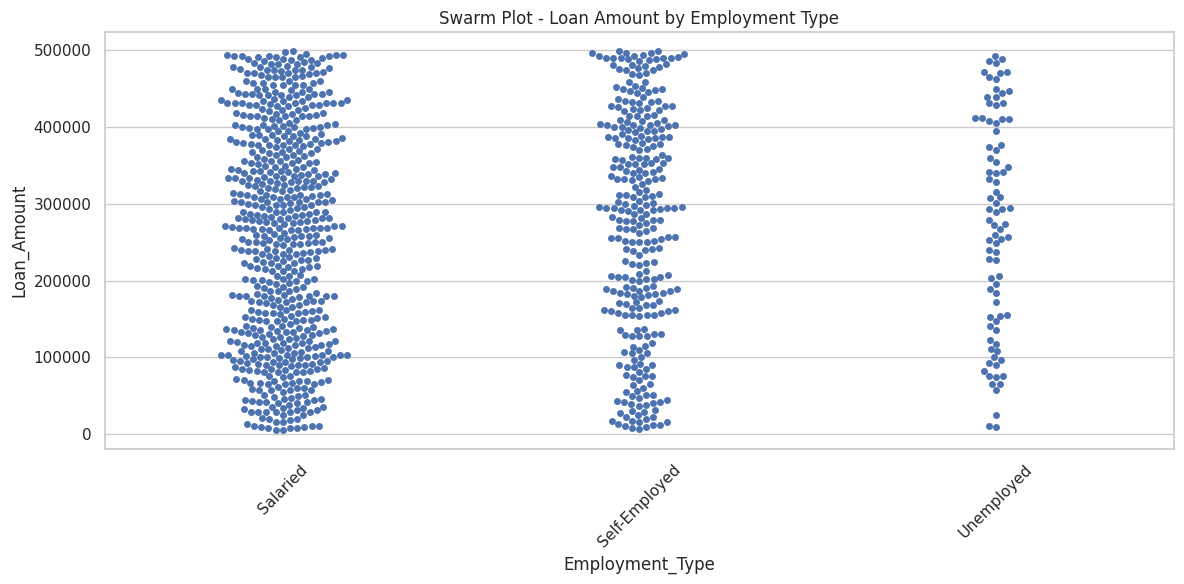

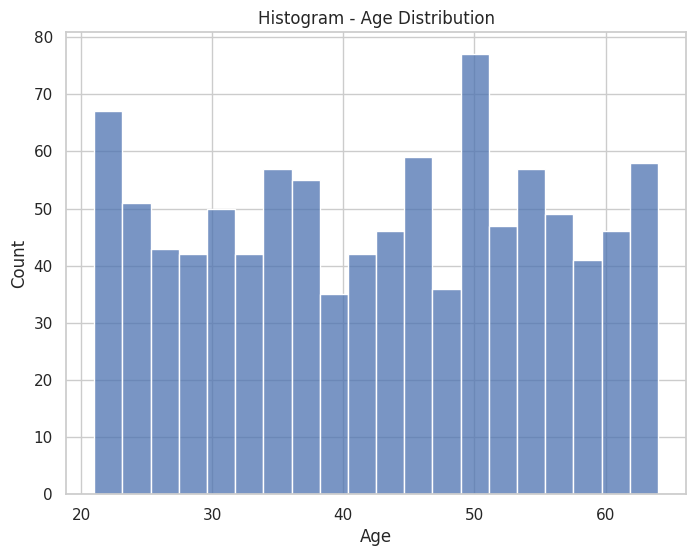

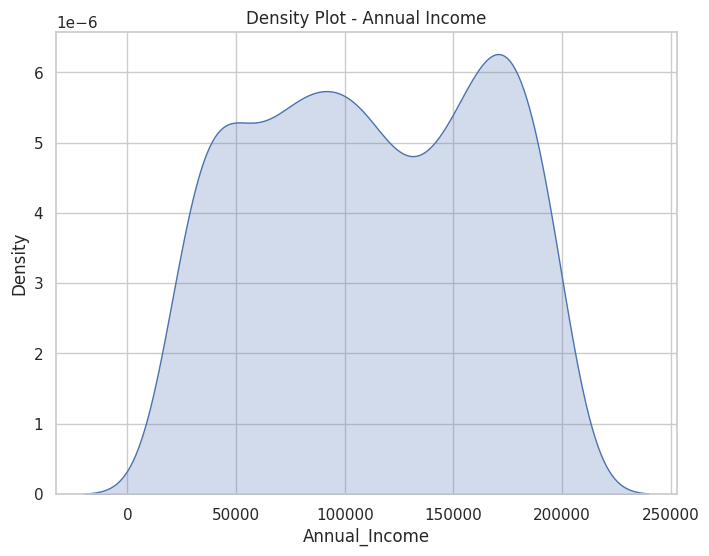

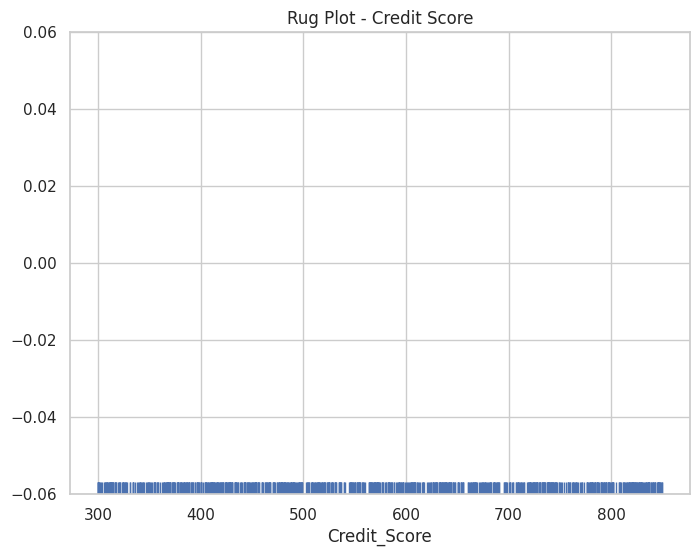

In [1]:
# ---------------------------------------------
# Step 1: Import required libraries
# ---------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# ---------------------------------------------
# Step 2: Load Dataset
# ---------------------------------------------
df = pd.read_csv("/content/banking_loan_applications.csv")

# ---------------------------------------------
# Step 3: Display Initial Data
# ---------------------------------------------
print("First 5 rows of the dataset:")
print(df.head())

# ---------------------------------------------
# Step 4: Data Cleaning
# ---------------------------------------------
df['Application_Date'] = pd.to_datetime(df['Application_Date'], errors='coerce')

# ---------------------------------------------
# Step 5: Check for Missing Values
# ---------------------------------------------
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# ---------------------------------------------
# Step 6: Check Data Types
# ---------------------------------------------
print("\nData Types of Columns:")
print(df.dtypes)

# -------------------------------------------------
#   UNIVARIATE ANALYSIS
# -------------------------------------------------

# --- CATEGORICAL DATA ---

# Bar Chart - Frequency of Loan Purpose
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Loan_Purpose', order=df['Loan_Purpose'].value_counts().index)
plt.title("Bar Chart - Frequency of Loan Purpose")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pie Chart - Loan Status Distribution
loan_status_counts = df['Loan_Status'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Pie Chart - Loan Status Distribution")
plt.axis('equal')
plt.show()

# --- CONTINUOUS DATA ---

# Scatterplot - Annual Income vs Loan Amount
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual_Income', y='Loan_Amount', hue='Gender')
plt.title("Scatterplot - Annual Income vs Loan Amount")
plt.show()

# Line Plot - Loan Amounts Over Time
df_sorted = df.sort_values('Application_Date')
plt.figure(figsize=(12,6))
sns.lineplot(data=df_sorted, x='Application_Date', y='Loan_Amount')
plt.title("Line Plot - Loan Amounts Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Strip Plot - Credit Score by Loan Status
plt.figure(figsize=(10,6))
sns.stripplot(data=df, x='Loan_Status', y='Credit_Score', jitter=True)
plt.title("Strip Plot - Credit Score by Loan Status")
plt.show()

# Swarm Plot - Loan Amount by Employment Type
plt.figure(figsize=(12,6))
sns.swarmplot(data=df, x='Employment_Type', y='Loan_Amount')
plt.title("Swarm Plot - Loan Amount by Employment Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histogram - Age Distribution
plt.figure(figsize=(8,6))
sns.histplot(df['Age'], bins=20)
plt.title("Histogram - Age Distribution")
plt.show()

# Density Plot - Annual Income Distribution
plt.figure(figsize=(8,6))
sns.kdeplot(df['Annual_Income'], fill=True)
plt.title("Density Plot - Annual Income")
plt.show()

# Rug Plot - Credit Score
plt.figure(figsize=(8,6))
sns.rugplot(df['Credit_Score'])
plt.title("Rug Plot - Credit Score")
plt.show()
